In [372]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [373]:
import numpy as np
import pandas as pd

In [374]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [375]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [376]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [377]:
engine.table_names()

<ipython-input-377-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['measurement', 'station']

In [378]:
# reflect an existing database into a new model

con = engine.connect()

In [379]:
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [380]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [381]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [382]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [383]:
# To find the latest date in the given record
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0.5, 1.0, 'Precipitation vs date')

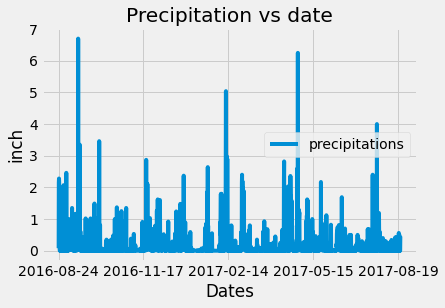

In [412]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

# Creating a list for dates and precipitation
d=[]
p=[]
for i in session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23'):
    d.append(i[0])
    p.append(i[1])
df = pd.DataFrame(list(zip(d,p)), columns =['Dates', 'precipitations'])
# Setting the date column as index
df = df.set_index('Dates')
# Printing the DateFrame
df = df.sort_values(by = 'Dates')
df = df.dropna()
df.plot()
plt.ylabel('inch')
plt.xlabel('Dates')
plt.title('Precipitation vs date')

In [395]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [424]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [437]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
m.station.value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [468]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp =[]
t=[]
for i in session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs):
    temp.append(i[1])
    t.append(i)
print(f'The heighest temperature recorded was : ' , max(temp))
print(f'The lowest temperature recorded was : ' , min(temp))
print(f'The average temperature recorded was : ' , sum(temp)/len(temp))

The heighest temperature recorded was :  85.0
The lowest temperature recorded was :  54.0
The average temperature recorded was :  71.66378066378067


(array([ 11.,  26.,  89., 192., 447., 782., 743., 347., 119.,  16.]),
 array([54. , 57.1, 60.2, 63.3, 66.4, 69.5, 72.6, 75.7, 78.8, 81.9, 85. ]),
 <BarContainer object of 10 artists>)

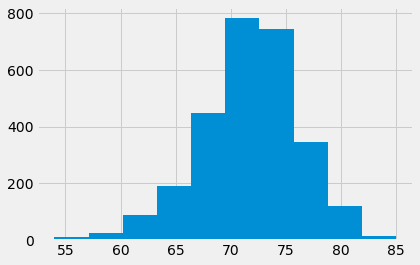

In [477]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tdf = pd.DataFrame(t, columns=('Date', 'prcp'))
tdf = tdf.set_index('Date')
plt.hist(tdf['prcp'])

## Bonus Challenge Assignment

In [212]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [213]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
